In [19]:
pip install tensorflow numpy matplotlib pillow scikit-learn


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = 'path_to_your_train_dataset'
val_dir = 'path_to_your_validation_dataset'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32
)

# Save the trained model
model.save('plant_disease_detection_model.h5')

# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 9))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the possum dataset
# You need to replace 'path_to_possum_dataset.csv' with your actual dataset path.
# Assuming the dataset has columns like 'age', 'weight', 'head_length', etc.
data = pd.read_csv("C:/Users/Chandan D/Downloads/possum.csv")

# Quick overview of the data
print(data.head())
print(data.describe())

# Checking for null values
print(data.isnull().sum())

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Possum Data')
plt.show()

# Selecting features for linear regression
# Let's assume we're predicting 'weight' based on 'head_length' and 'tail_length'
X = data[['head_length', 'tail_length']]  # Independent variables
y = data['weight']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

# Displaying coefficients and intercept
print(f'Coefficients: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Weight')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

# Plotting residuals (errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    

ValueError: could not convert string to float: 'Vic'

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    

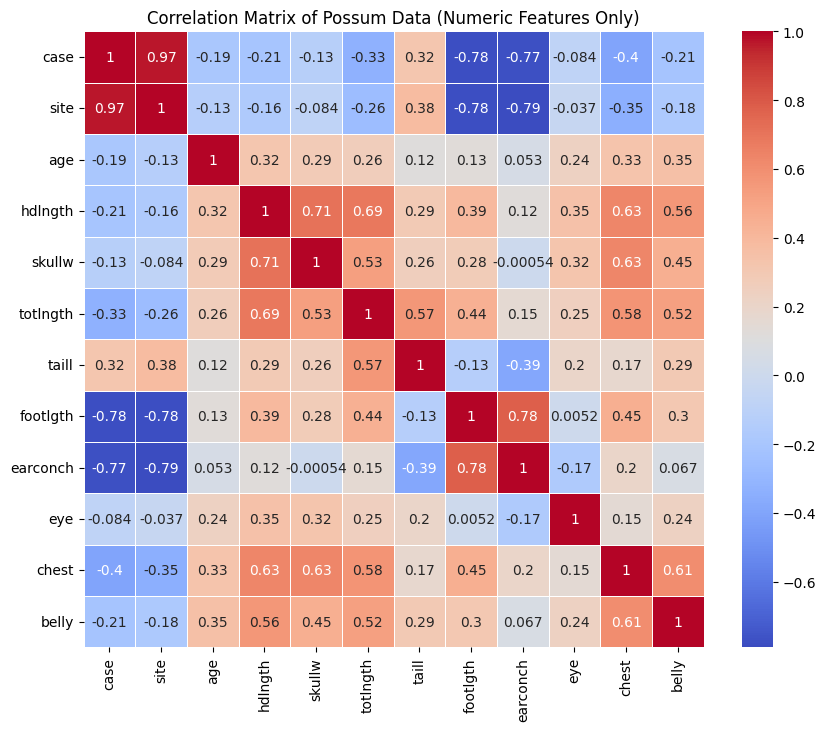

              case      site       age   hdlngth    skullw  totlngth  \
case      1.000000  0.970353 -0.194525 -0.209177 -0.125065 -0.334329   
site      0.970353  1.000000 -0.131423 -0.163646 -0.083548 -0.260843   
age      -0.194525 -0.131423  1.000000  0.319022  0.285107  0.260280   
hdlngth  -0.209177 -0.163646  0.319022  1.000000  0.710827  0.691094   
skullw   -0.125065 -0.083548  0.285107  0.710827  1.000000  0.526413   
totlngth -0.334329 -0.260843  0.260280  0.691094  0.526413  1.000000   
taill     0.315351  0.380444  0.118241  0.287429  0.255921  0.565646   
footlgth -0.782368 -0.783009  0.126190  0.391605  0.275059  0.444832   
earconch -0.773727 -0.790716  0.053405  0.121463 -0.000537  0.154484   
eye      -0.084078 -0.036987  0.235553  0.347175  0.321991  0.247786   
chest    -0.402303 -0.345494  0.334209  0.631498  0.629737  0.577890   
belly    -0.211671 -0.175266  0.354298  0.562663  0.451838  0.519465   

             taill  footlgth  earconch       eye     chest     

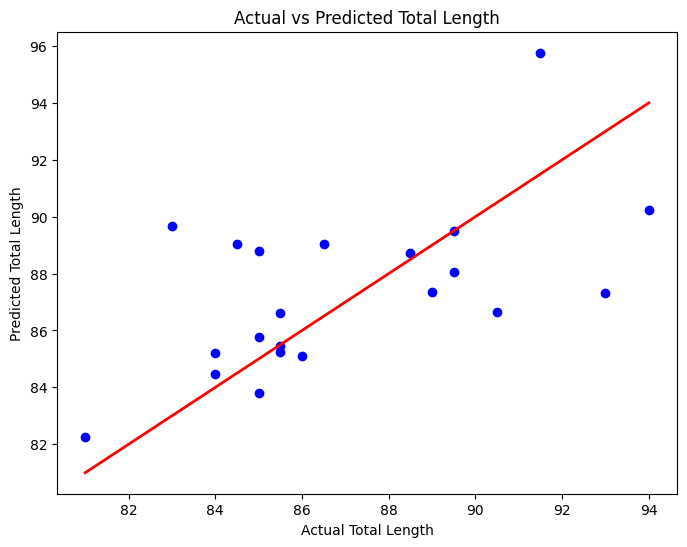

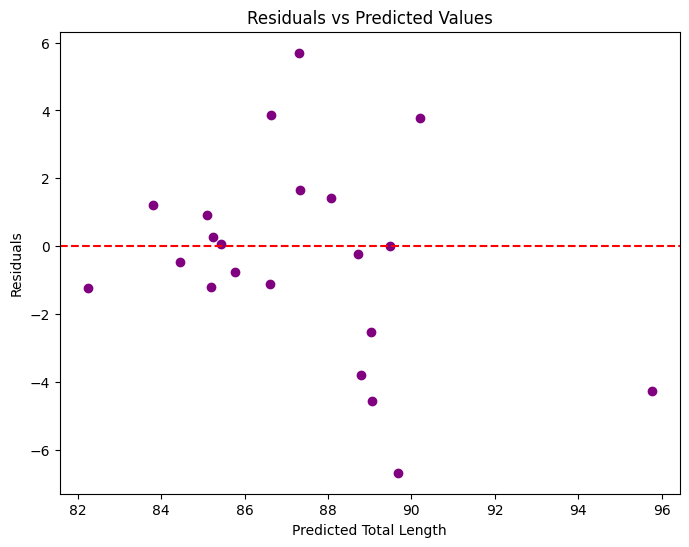

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the possum dataset
data = pd.read_csv("C:/Users/Chandan D/Downloads/possum.csv")  # Replace with the correct path

# Quick overview of the data
print(data.head())
print(data.describe())

# Checking for null values
print(data.isnull().sum())

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[float, int])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Possum Data (Numeric Features Only)')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

# -----------------------
# Linear Regression Model
# -----------------------

# Features (independent variables) and target (dependent variable)
X = data[['hdlngth', 'taill']]  # Using head length and tail length as predictors
y = data['totlngth']  # Target is total length

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

# Displaying the coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Total Length')
plt.xlabel('Actual Total Length')
plt.ylabel('Predicted Total Length')
plt.show()

# Plotting residuals (errors)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Total Length')
plt.ylabel('Residuals')
plt.show()
